# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Picart, David Kyle\
_Student No._: 2022-01148\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** David Kyle R. Picart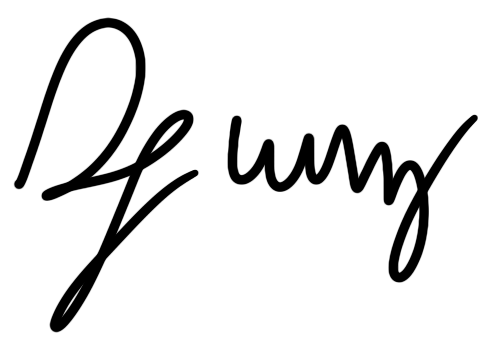

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [ ]:
import numpy as np

'''
#1
'''
def f(x):                           #define the function to integrate
  return 2*x**4 + 3*x**2 + 4*x + 5

a = 0                               #lower limit of integration
b = 5                               #upper limit of integration

def trap(N):                                          #define trapezoidal integral function, number of slices as input
  h = (b-a)/N                                         #width of each slice
  x = np.linspace(a,b,N+1)                            #create an array of x values, N+1 points for N slices
  y = f(x)                                            #create an array of f(x) values
  return (h/2)*(y[0] + 2*sum(y[1:N]) + y[N])          #add 1 for each endpoint, 2 for each midpoint

result1, result2, result3 = trap(10), trap(100), trap(1000)                     #label the respective results

print(f"The values of the integral using the trapezoidal rule (10, 100, 1000 slices respectively) are {result1}, {result2}, {result3}")

'''
#2
'''
R = 1450                            #theoretical value for the integral
def perr(result):                   #define percent error function
  return 100*abs(result-R)/R

error1, error2, error3 = perr(result1), perr(result2), perr(result3)            #label the respective errors

print(f"The % errors of each iteration are {error1}%, {error2}%, {error3}%")    #use fstrings to make print statement more compact

'''
#3
'''
def simp(N):                        #define integral function, number of slices as input
  h = (b-a)/N
  x = np.linspace(a,b,N+1)              #create an array of x values, N+1 points for N slices
  y = f(x)                              #create an array of f(x) values
  s = y[0] + y[N]                       #initialize the sum
  for i in range(1,N):                  #sum from 1 to N-1 (in-between terms)
    if i%2 == 1:                            #take odd elements
      s += 4*y[i]
    else:                                   #take even elements
      s += 2*y[i]
  return s*h/3                          #multiply by h/3

result4, result5, result6 = simp(10), simp(100), simp(1000)

print(f"\nThe values of the integral using the Simpson's rule (10, 100, 1000 slices respectively) are {result4}, {result5}, {result6}")

'''
#4
'''
error4, error5, error6 = perr(result4), perr(result5), perr(result6) #use the same function in number 2

print(f"The % errors of each iteration are {error4}%, {error5}%, {error6}%")
print("\nThe percent error for simpson's rule is orders of magnitude smaller that for trapezoidal rule for the same number of slices")
print("Specifically, the trapezoidal rule's error is proportional to h^2 while Simpson's rule's error is proportional to h^4")

The values of the integral using the trapezoidal rule (10, 100, 1000 slices respectively) are 1471.4375, 1450.2145812500003, 1450.0021458331234
The % errors of each iteration are 1.478448275862069%, 0.01479870689656999%, 0.00014798849127240326%

The values of the integral using the Simpson's rule (10, 100, 1000 slices respectively) are 1450.0833333333333, 1450.0000083333334, 1450.0000000008333
The % errors of each iteration are 0.005747126436776382%, 5.747126500676226e-07%, 5.7470656586168655e-11%

The percent error for simpson's rule is orders of magnitude smaller that for trapezoidal rule for the same number of slices
Specifically, the trapezoidal rule's error is proportional to h^2 while Simpson's rule's error is proportional to h^4


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
import numpy as np
'''
#1
'''
def gaussxw(N):
#Initial approximation to roots of the Legendre polynomial
  a = np.linspace(3,4*N-1,N)/(4*N+2)          #create an array with N elements, from 3,7,11,... divided by a factor
  x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))     #approximate N roots using the formula

  #Find roots using Newton's method
  epsilon = 1e-15               #threshold value for error in x
  delta = 1.0                   #initialize the error value
  while delta > epsilon:        #find x values that are at most epsilon away from 0
    p0 = np.ones(N,float)            #make a 1D array of 1s with N elements
    p1 = np.copy(x)                  #start with a copy of x

    for k in range(1,N):        #go through every root, element in array
      p0, p1 = (p1), ((2*k+1)*x*p1-k*p0)/(k+1)       #newton's method

    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx                     #apply the correction for the next loop
    delta = max(abs(dx))        #loop break condition

#Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w                 #returns two values

'''
#2
'''
def f(x):            #define the function to integrate
  return 2*x**4 + 3*x**2 + 4*x + 5

N = 3                #number of slices/roots of Legendre polynomial
a = 0                #limits of integration
b = 5

#Calculate the sample points and weights, then map them to the required integration domain
x,w = gaussxw(N)

xp = 0.5*(b-a)*x + 0.5*(b+a)        #center the values on the interval [0,5]
wp = 0.5*(b-a)*w

#Perform the integration
s = 0.0
for k in range(N):          #loop to sum all the w*f(xp)
  s += wp[k] * f(xp[k])        #add the product of the kth element of wp and f(xp)

print(s)


1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

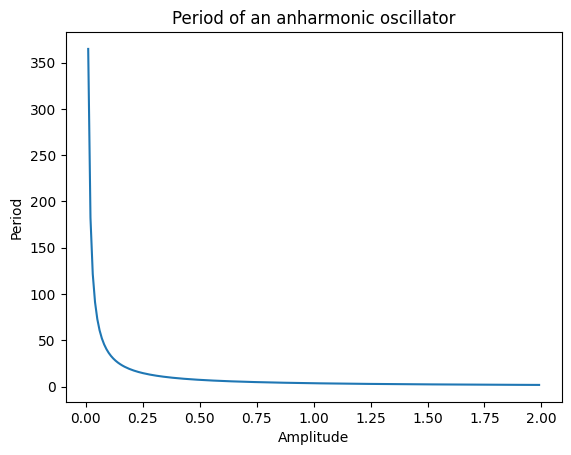

The period decreases very quickly as the amplitude increases in a nonlinear trend.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):           #function to evaluate the integral numerically
#Initial approximation to roots of the Legendre polynomial
  a = np.linspace(3,4*N-1,N)/(4*N+2)
  x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

  #Find roots using Newton's method
  epsilon = 1e-15               #threshold value for error in x
  delta = 1.0                   #initialize the error value
  while delta > epsilon:        #find x values that are at most epsilon away from 0
    p0 = np.ones(N,float)            #make a 1D array of 1s with N elements
    p1 = np.copy(x)                  #start with a copy of x

    for k in range(1,N):        #go through every root, element in array
      p0, p1 = (p1), ((2*k+1)*x*p1-k*p0)/(k+1)       #newton's method

    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx                     #apply the correction for the next loop
    delta = max(abs(dx))        #loop break condition

#Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w                 #returns two values

def V(x):                 #define the potential function
  return x**4

def gaussint(A):          #define a function to return the period given by the formula
  def f(x):                   #define the integrand, dependent on A
    return 1/np.sqrt(V(A)-V(x))

  m = 1                   #mass
  N = 20                  #number of slices/roots of Legendre polynomial
  a = 0                   #limits of integration
  b = A

  #Calculate the sample points and weights, then map them to the required integration domain
  x,w = gaussxw(N)

  xp = 0.5*(b-a)*x + 0.5*(b+a)        #center the values on the interval [0,5]
  wp = 0.5*(b-a)*w

  #Perform the integration
  s = 0.0                      #initialize sum
  for k in range(N):           #loop to sum all the w*f(xp)
    s += wp[k] * f(xp[k])        #add the product of the kth element of wp and f(xp)

  T = np.sqrt(8*m) * s         #formula for the period with integral as s
  return T

X = np.arange(0.01,2,0.01)         #define the x-axis array of amplitude
Y = []                             #initialize the y-axis list of period
for number in X:
  Y.append(gaussint(number))       #match each element in X with a period value in Y
plt.plot(X,Y)                      #generate the plot
plt.xlabel("Amplitude")            #label the figure
plt.ylabel("Period")
plt.title("Period of an anharmonic oscillator")
plt.show()                         #show plot
print("The period decreases very quickly as the amplitude increases in a nonlinear trend. The graph of the potential is nearly flat in the middle and quickly rises as you go away from the origin.")
print("Thus, a particle released closer to the origin will barely speed up as it falls inward. If released further from the origin, it picks up a lot more speed to fall ")